# Grape V1 Data Plots
The purpose of this notebook is to provide a one-stop shop for plotting data from the prototype of the Grape 1 Low-Cost Personal Space Weather Station. 

This notebook was created by Kristina Collins KD8OXT. Code was contributed by Aidan Montare KB3UMD, Bob Benedict KD8CGH, and Nathaniel Frissell W2NAF. Hardware designed by John Gibbons. Node maintainers are listed in the `nodelist.csv` file which accompanies this notebook.

## Instructions:
Data is permanently stored at [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6622112.svg)](https://doi.org/10.5281/zenodo.6622112). To use this notebook, download the data from the repository and unzip it into the `data/` directory.

In [1]:
import datetime
import pytz

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from hamsci_grape1 import grape1

In [2]:
mpl.rcParams['font.size']        = 16
mpl.rcParams['font.weight']      = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.grid']        = True
mpl.rcParams['grid.linestyle']   = ':'
mpl.rcParams['figure.figsize']   = np.array([15, 8])
mpl.rcParams['axes.xmargin']     = 0

# Generate Data Overview
The first step is to pull the list of filenames from the server maintained by the WWV Amateur Radio Club, WW0WWV. We will then generate a pandas dataframe from the filename list using the split() function. This will tell us the earliest and latest dates of data collection; we can use these as the bounds of our analysis, or substitute in a smaller set of bounds. We'll use this to create a Data Inventory (Gantt chart) showing station availability, and maybe keograms of our data over time. While we're at it, we can also generate two versions of a station map: one static, to put in our paper; and one dynamic, showing which stations were active at a given point in time. 

## Data Inventory

In [3]:
inventory = grape1.DataInventory()

In [4]:
#inventory.df

In [5]:
#inventory.plot_inventory()

## Registered Nodes

In [6]:
nodes = grape1.GrapeNodes(logged_nodes=inventory.logged_nodes)

In [7]:
#nodes.status_table()

In [8]:
#nodes.plot_map()

## Load Grape Data - Individual Station

In [9]:
# kws  = dict(N=2,Tc_min = (15, 60),btype='bandpass',fs=1.)
filt = grape1.Filter()
#filt.plotResponse()

In [10]:
node   = 7
sTime  = datetime.datetime(2021,10,28, tzinfo=pytz.UTC)
eTime  = sTime + datetime.timedelta(days=3)
freq   = 10e6 # MHz
gd_007 = grape1.GrapeData(node,freq,sTime,eTime,inventory=inventory,grape_nodes=nodes)

Loading Raw Data:   0%|                                                                                       …

In [11]:
gd_007.process_data()

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                                         …

  Solar Time Computation Time: 0:00:02.618711
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.052688
Computing Solar Local Time on resampled...


  0%|                                                                                                         …

  Solar Time Computation Time: 0:00:02.727553
dB Conversion
  dB Conversion Time: 0:00:00.003280
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.022970

Total Processing Time: 0:00:05.425509


{'fig': <Figure size 1080x864 with 2 Axes>}

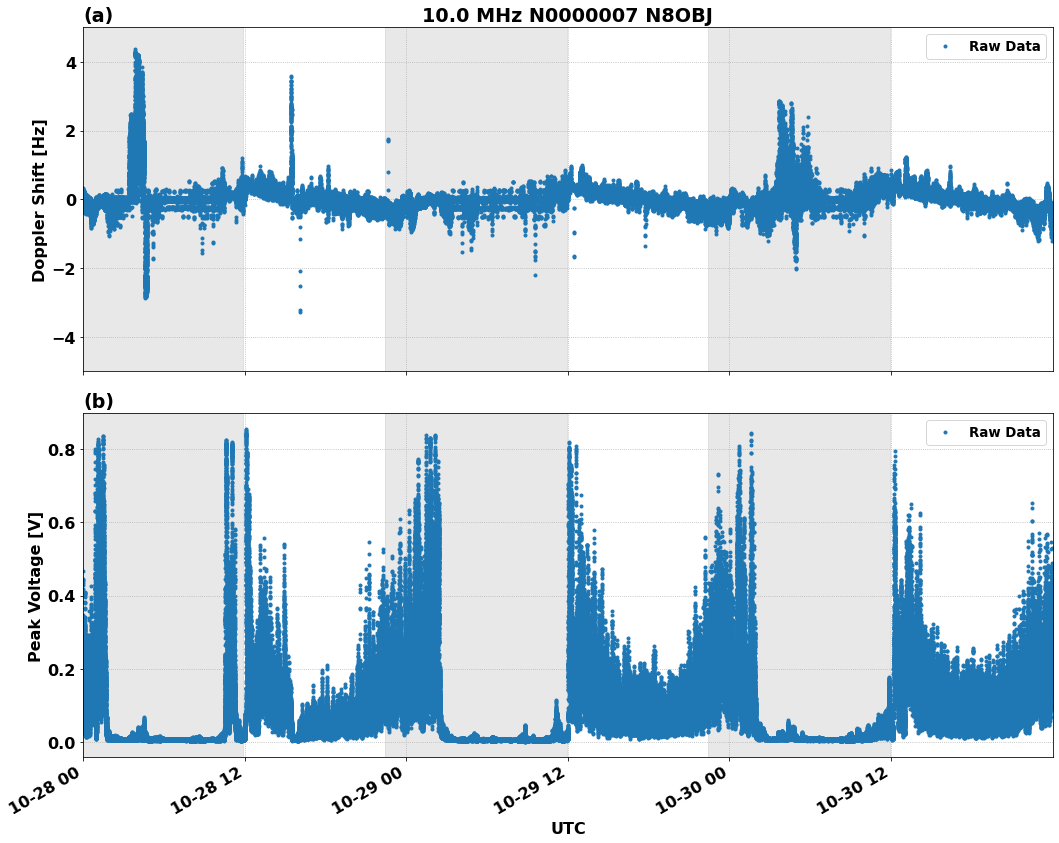

In [12]:
gd_007.plot_timeSeries(ylims={'Freq':(-5,5)})

{'fig': <Figure size 1080x1296 with 3 Axes>}

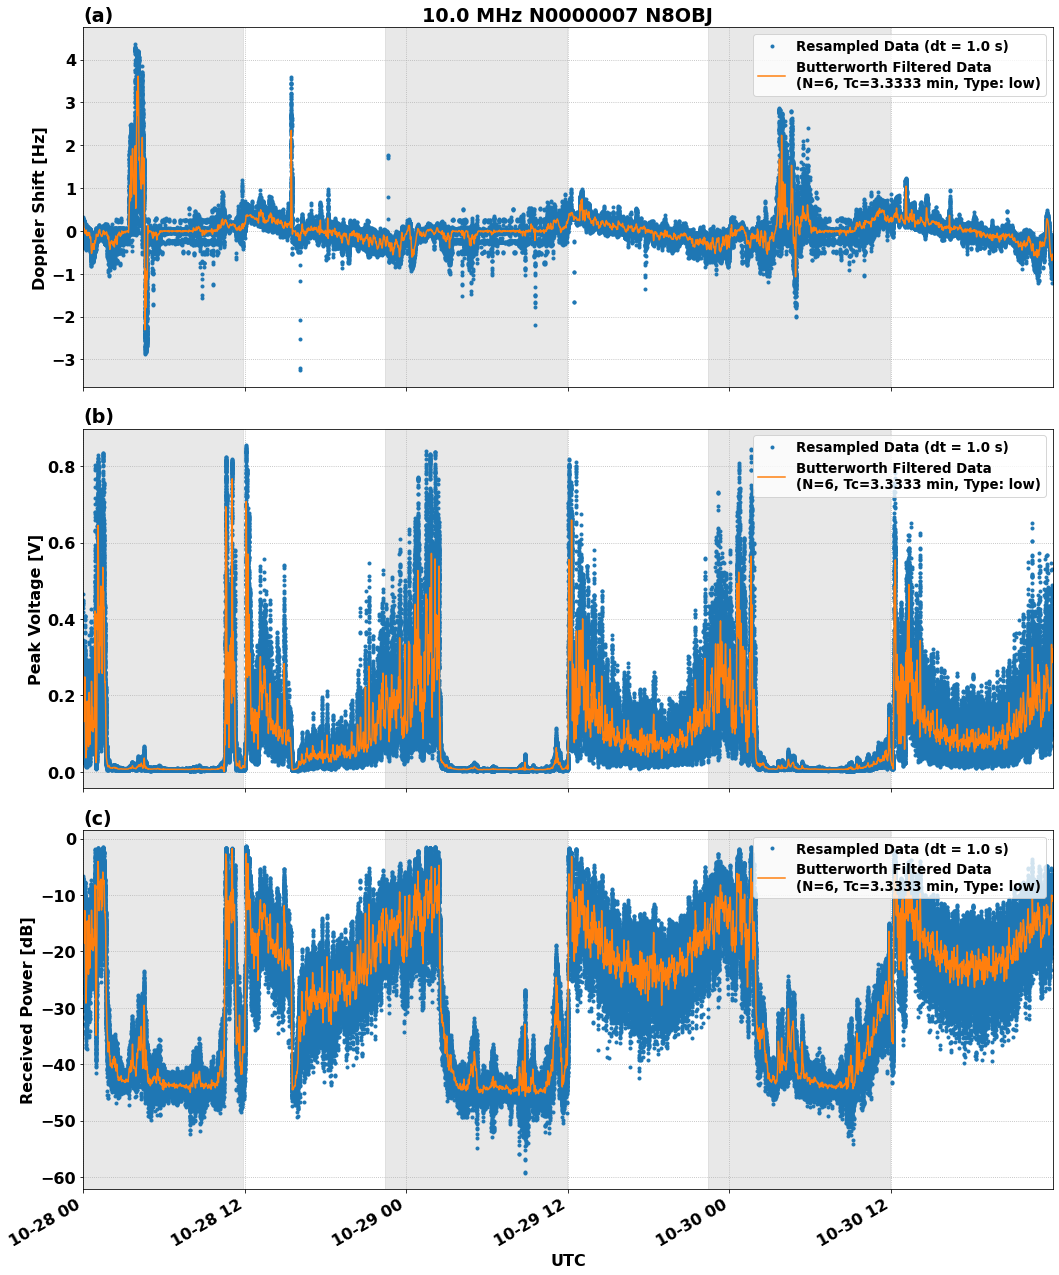

In [13]:
gd_007.plot_timeSeries(['resampled','filtered'])

{'fig': <Figure size 1080x1296 with 3 Axes>}

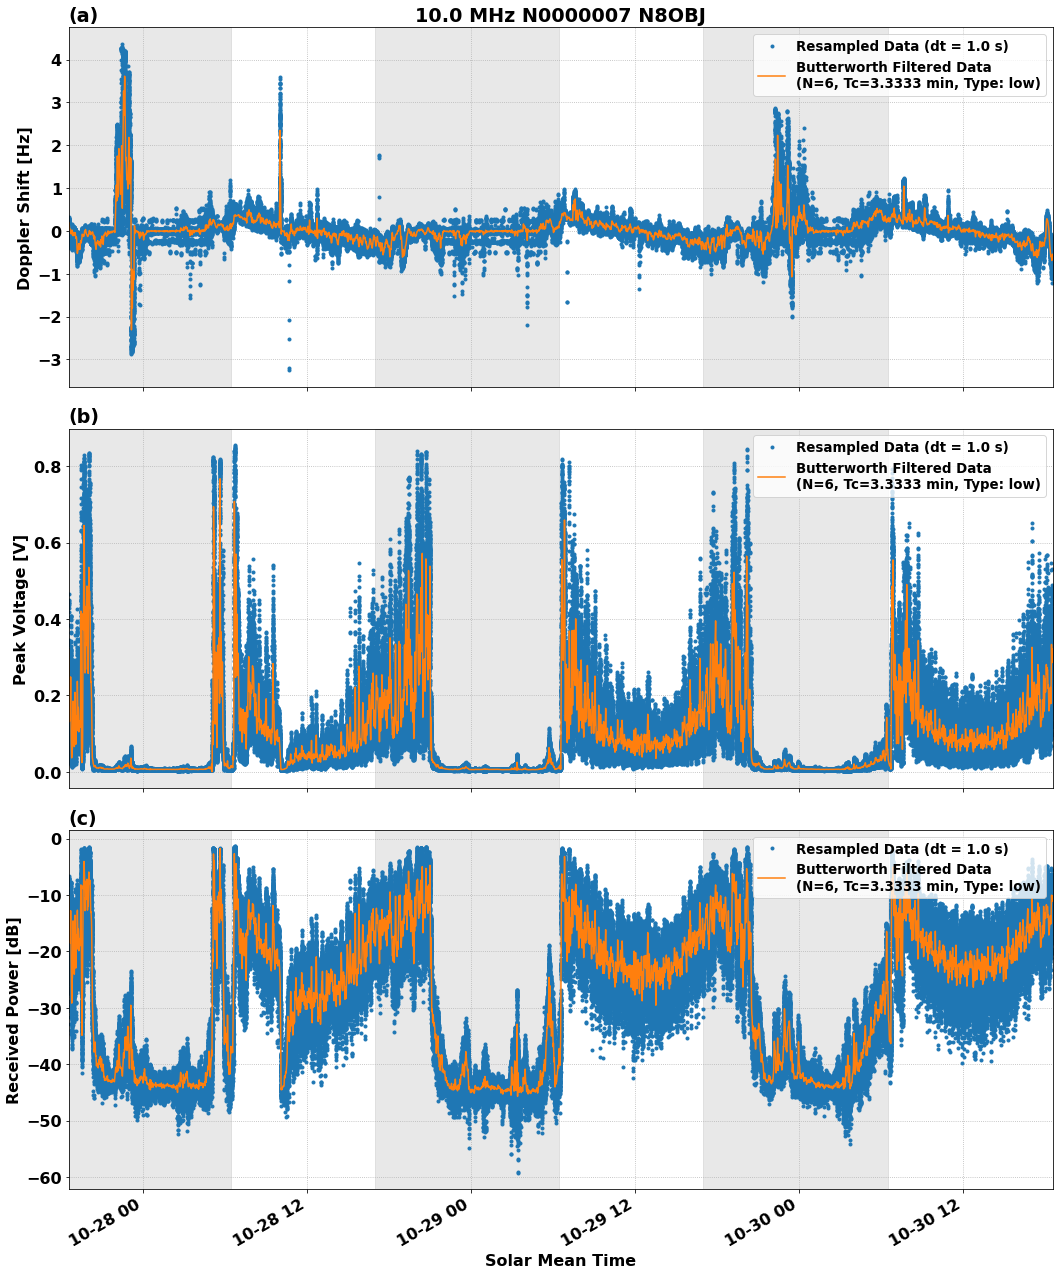

In [14]:
gd_007.plot_timeSeries(['resampled','filtered'],xkey='SLT')

## Climatology

In [15]:
node   = 7
freq   = 10e6 # MHz
gd_007 = grape1.GrapeData(node,freq,inventory=inventory,grape_nodes=nodes)

Loading Raw Data:   0%|                                                                                       …

In [16]:
gd_007.process_data('5min_mean')

Processing data using "5min_mean" profile...

Resampling data with 5.0 minute cadence...
  Resampling Time: 0:00:14.250273
Computing Solar Local Time on resampled...


  0%|                                                                                                         …

  Solar Time Computation Time: 0:00:02.018369
dB Conversion
  dB Conversion Time: 0:00:00.002563

Total Processing Time: 0:00:16.271571


In [17]:
df = gd_007.data['resampled']['df']
df

,UTC,SLT,Freq,Vpk,Power_dB
0,2020-07-28 19:42:06+00:00,2020-07-28 14:16:04.862640,-0.014710,0.025950,-31.717182
1,2020-07-28 19:47:06+00:00,2020-07-28 14:21:04.862640,-0.019106,0.022061,-33.127445
2,2020-07-28 19:52:06+00:00,2020-07-28 14:26:04.862640,-0.010471,0.025454,-31.884995
3,2020-07-28 19:57:06+00:00,2020-07-28 14:31:04.862640,-0.029596,0.026669,-31.479965
4,2020-07-28 20:02:06+00:00,2020-07-28 14:36:04.862640,-0.022100,0.024121,-32.352130
...,...,...,...,...,...
193295,2022-05-30 23:37:06+00:00,2022-05-30 18:11:04.862640,-0.132147,0.018796,-34.518855
193296,2022-05-30 23:42:06+00:00,2022-05-30 18:16:04.862640,-0.102942,0.023636,-32.528685
193297,2022-05-30 23:47:06+00:00,2022-05-30 18:21:04.862640,-0.215628,0.028399,-30.933809
193298,2022-05-30 23:52:06+00:00,2022-05-30 18:26:04.862640,-0.215300,0.031356,-30.073487


{'fig': <Figure size 1080x1296 with 3 Axes>}

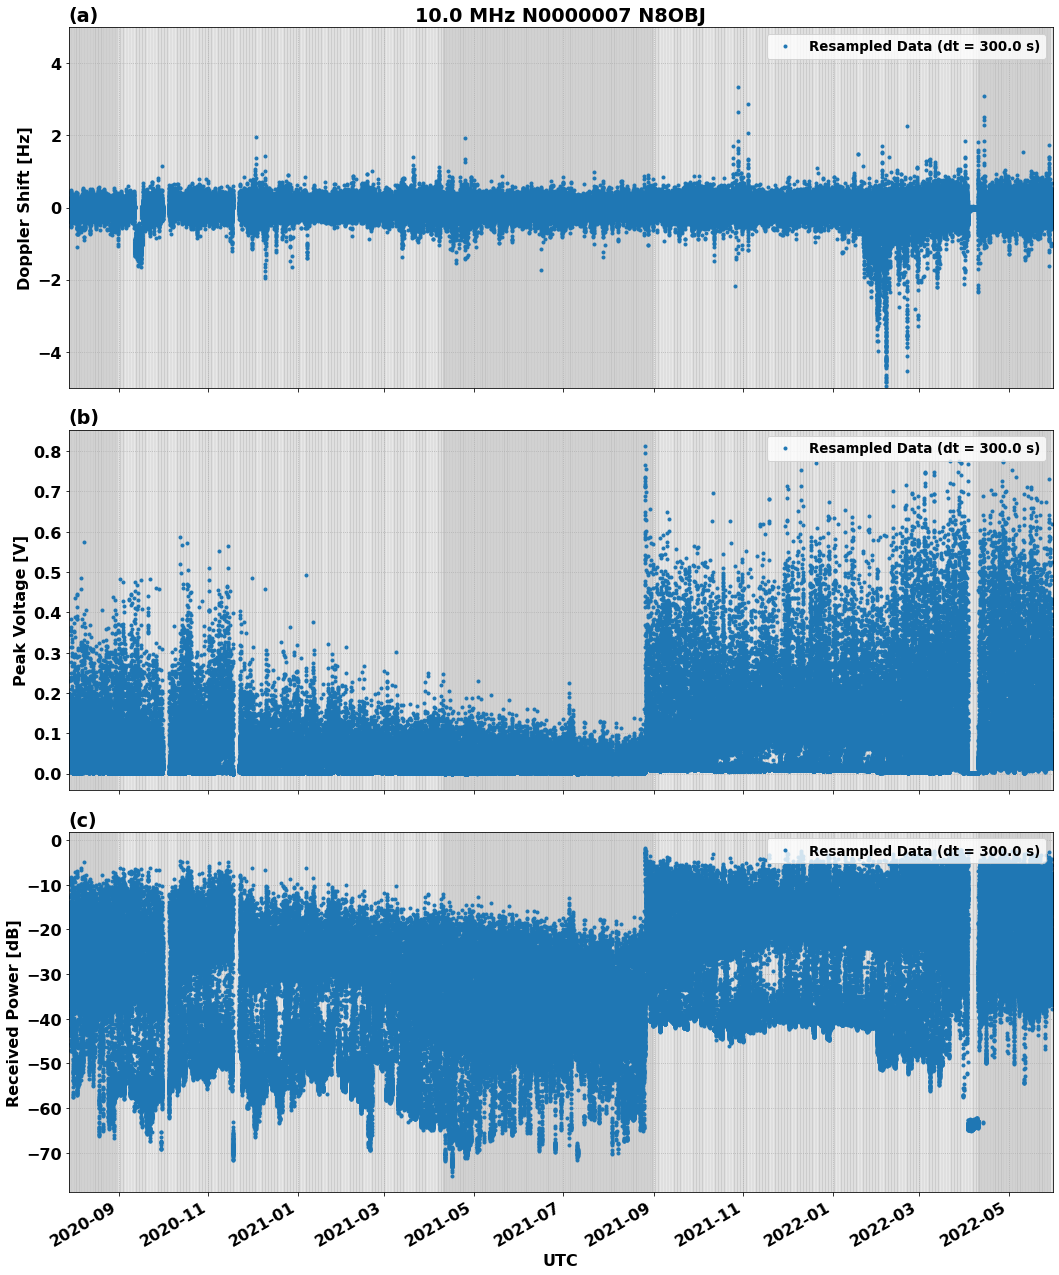

In [18]:
gd_007.plot_timeSeries('resampled',ylims={'Freq':(-5,5)})